In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
API_KEY = "1842b16f5d7925d26b3e1876c8c322a6"
CITY = "Pune"
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"


In [ ]:
response = requests.get(URL)
data = response.json()

                    dt   temp  humidity  wind
0  2025-09-09 18:00:00  21.69        88  1.89
1  2025-09-09 21:00:00  21.45        88  2.01
2  2025-09-10 00:00:00  20.92        87  1.96
3  2025-09-10 03:00:00  23.31        76  1.75
4  2025-09-10 06:00:00  26.41        63  1.84


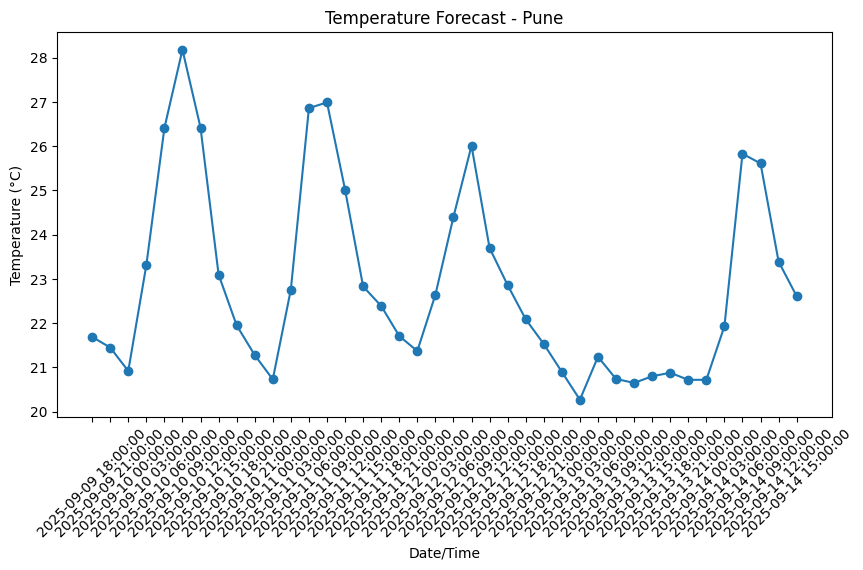

In [ ]:
weather = []
for item in data['list']:
    weather.append({
        "dt": item['dt_txt'],
        "temp": item['main']['temp'],
        "humidity": item['main']['humidity'],
        "wind": item['wind']['speed']
    })

df = pd.DataFrame(weather)
print(df.head())

# Plot temperature trend
plt.figure(figsize=(10,5))
plt.plot(df["dt"], df["temp"], marker='o')
plt.xticks(rotation=45)
plt.title("Temperature Forecast - Pune")
plt.xlabel("Date/Time")
plt.ylabel("Temperature (°C)")
plt.show()

In [ ]:
df["dt"] = pd.to_datetime(df["dt"])   # convert to datetime
df = df.dropna()  # drop missing if any


In [ ]:
print("Average Temperature:", df["temp"].mean())
print("Max Temperature:", df["temp"].max())
print("Min Temperature:", df["temp"].min())

Average Temperature: 22.87225
Max Temperature: 28.18
Min Temperature: 20.27


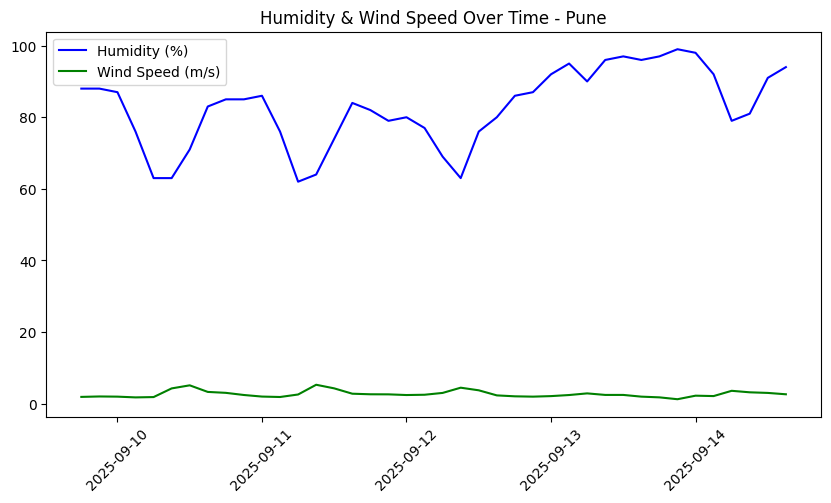

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df["dt"], df["humidity"], color="blue", label="Humidity (%)")
plt.plot(df["dt"], df["wind"], color="green", label="Wind Speed (m/s)")
plt.xticks(rotation=45)
plt.legend()
plt.title("Humidity & Wind Speed Over Time - Pune")
plt.show()

In [ ]:
df["date"] = df["dt"].dt.date
daily_summary = df.groupby("date").agg({
    "temp": ["mean", "max", "min"],
    "humidity": "mean",
    "wind": "mean"
}).reset_index()

print("\nDaily Weather Summary:\n", daily_summary)


Daily Weather Summary:
          date       temp                 humidity      wind
                    mean    max    min       mean      mean
0  2025-09-09  21.570000  21.69  21.45  88.000000  1.950000
1  2025-09-10  23.946250  28.18  20.92  76.625000  2.956250
2  2025-09-11  23.661250  26.99  20.73  75.875000  2.993750
3  2025-09-12  23.075000  26.01  21.37  77.250000  2.801250
4  2025-09-13  20.775000  21.24  20.27  95.250000  2.153750
5  2025-09-14  23.348333  25.83  20.72  89.166667  2.788333


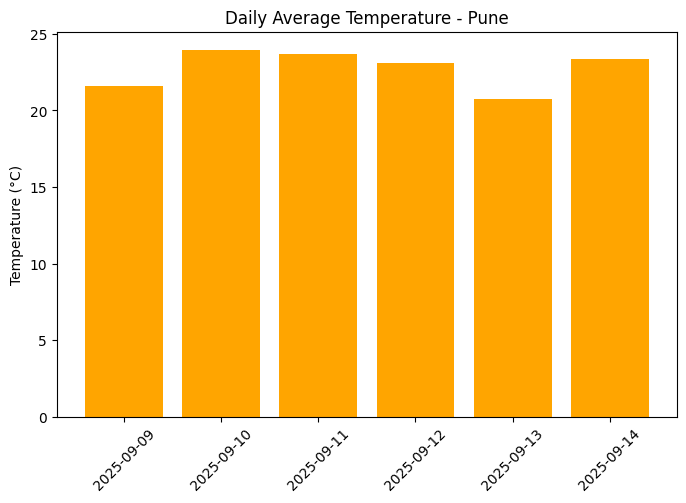

In [ ]:
plt.figure(figsize=(8,5))
plt.bar(daily_summary["date"], daily_summary["temp"]["mean"], color="orange")
plt.xticks(rotation=45)
plt.title("Daily Average Temperature - Pune")
plt.ylabel("Temperature (°C)")
plt.show()

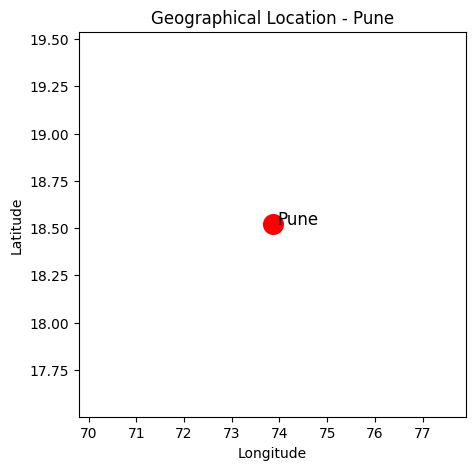

In [ ]:
lat, lon = 18.5204, 73.8567
plt.figure(figsize=(5,5))
plt.scatter(lon, lat, s=200, c="red", marker="o")
plt.text(lon+0.1, lat, "Pune", fontsize=12)
plt.title("Geographical Location - Pune")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


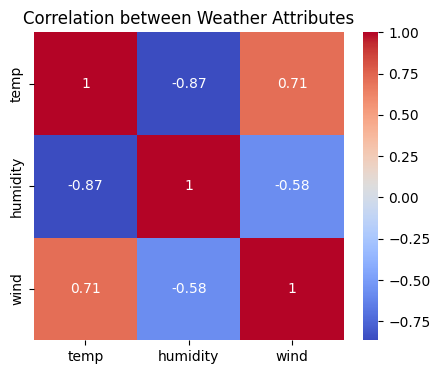

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(df[["temp","humidity","wind"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Weather Attributes")
plt.show()